# 1. A General Visualization and Data Exploration. 
### The purpose of this file is to provide the necessary data exploration and visualization part to help create a pre-eliminary idea but not only on the data sets as well as on the individual attributes.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
from wordcloud import WordCloud
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup

#importing the data sets and converting them to dataframes
dev_df = pd.read_csv("/home/user/Downloads/DSL2122/development.csv")
eval_df = pd.read_csv("/home/user/Downloads/DSL2122/evaluation.csv")

In [2]:
dev_df.head()

,sentiment,ids,date,flag,user,text
0,1,1833972543,Mon May 18 01:08:27 PDT 2009,NO_QUERY,Killandra,"@MissBianca76 Yes, talking helps a lot.. going..."
1,1,1980318193,Sun May 31 06:23:17 PDT 2009,NO_QUERY,IMlisacowan,SUNSHINE. livingg itttt. imma lie on the grass...
2,1,1994409198,Mon Jun 01 11:52:54 PDT 2009,NO_QUERY,yaseminx3,@PleaseBeMine Something for your iphone
3,0,1824749377,Sun May 17 02:45:34 PDT 2009,NO_QUERY,no_surprises,@GabrielSaporta couldn't get in to the after p...
4,0,2001199113,Tue Jun 02 00:08:07 PDT 2009,NO_QUERY,Rhi_ShortStack,@bradiewebbstack awww is andy being mean again...


In [3]:
eval_df.head()

,ids,date,flag,user,text
0,1999928613,Mon Jun 01 21:04:54 PDT 2009,NO_QUERY,urbanperspectiv,@engteacher I'm pretty much the same ...in eit...
1,1827919331,Sun May 17 11:43:09 PDT 2009,NO_QUERY,therealsecret,@JaxLicurse same here have a gr8 week ahead
2,1563640134,Sun Apr 19 23:37:52 PDT 2009,NO_QUERY,bitchville,@blacksweater that's just nightmares all over
3,2189786396,Tue Jun 16 00:54:27 PDT 2009,NO_QUERY,epi_longo,@dlead @jishanvn cháº¯c pháº£i Äi thi Äáº¡i ...
4,1974034022,Sat May 30 12:18:33 PDT 2009,NO_QUERY,Curiosafmmb,@CA_Sweetie awe. ok sweetie. ttyl. *hugs*


## 2. Dataframes Exploration

In [4]:
#checking for unique values in the flag attribute for both dev and eval dataframes
dev_df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [5]:
eval_df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [6]:
#checking the number of unique users in the development dataset
dev_df['user'].nunique()

10647

In [7]:
#checking the number of unique users in the evaluation dataset
eval_df['user'].nunique()

10647

In [8]:
#checking the number of positive and negative tweets, noticing that we have an imbalaced dataset: 
dev_df.sentiment.value_counts()

1    130157
0     94837
Name: sentiment, dtype: int64

In [9]:
#checking for null values in the development dataset:
dev_df.isna().sum()

sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64

In [10]:
#checking for null values in the evaluation dataset:
eval_df.isna().sum()

ids     0
date    0
flag    0
user    0
text    0
dtype: int64

In [11]:
#checking for duplicate values in the text column of the development dataframe:
dev_df.text.duplicated().sum()

1888

In [12]:
#checking the length of the development set:
len(dev_df)

224994

In [13]:
#checking the length of the evaluation set:
len(eval_df)

74999

In [14]:
#Dropping the columns 'ids' and 'flag' that do not seem to provide any added value:
dev_df.drop(['ids','flag'], axis=1, inplace=True)
eval_df.drop(['ids', 'flag'], axis=1, inplace=True)

In [15]:
#Visualization of the first 100 tweets to get an idea on the context: 
dev_df.text.values[:100]

array(["@MissBianca76 Yes, talking helps a lot.. going through it, there's no judgment... most sentences end with &quot;you know what I mean&quot; ",
       'SUNSHINE. livingg itttt. imma lie on the grass listening to oasis reading  burnt already',
       '@PleaseBeMine Something for your iphone ',
       "@GabrielSaporta couldn't get in to the after party. ",
       '@bradiewebbstack awww is andy being mean again?  Now i want maccas. ',
       "I'm getting so anxious about tomorrow. Help? ",
       '@nocturnalie The Doctors and Masters are screwed then! ',
       '@manxmidge barely been used. ',
       "hahah it can't work on livejournal ",
       '@socaldavel Ugh! Sorry ur sick!  Fresh fruit drinks &amp; Vits E, C, B, Echinacea &amp; Golden Seal. Rest is nice.',
       '@ShenaniganJenn boo i hate facebook. ',
       "I'm going for a while now - we're off out for a few hours! C yah  - and thanks again for all the birthday wishes! ",
       "@thisisbree yeah. Tried sleeping. Couldn't. 

##  3. Word Cloud Visualization: 
### A world-cloud is a visualization technique in which the size of the word’s font is proportional to the frequency of occurrence in the text, or tweets in our case.

In [16]:
import sys
!{sys.executable} -m pip install wordcloud



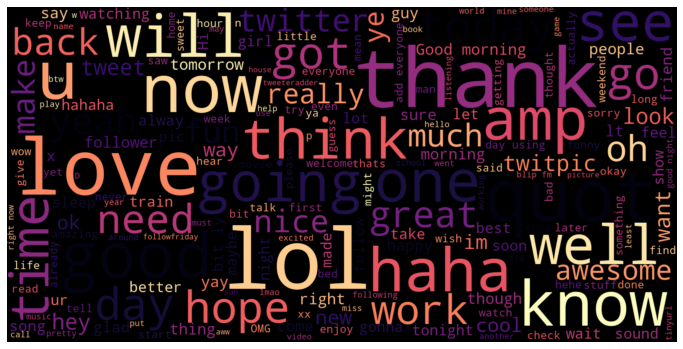

In [17]:
#Creating the wordcloud of the positive tweets:

pos_tweets = dev_df[dev_df.sentiment == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

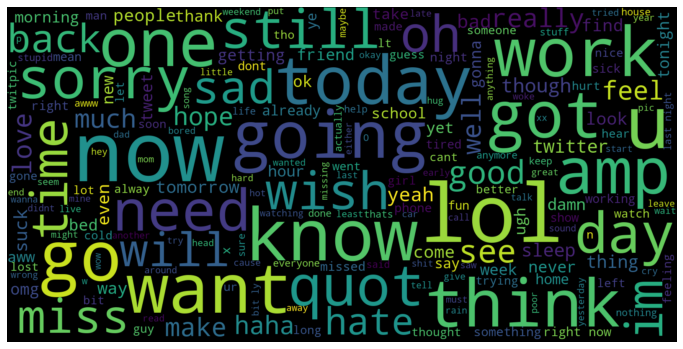

In [18]:
#Creating the WordCloud of negative tweets:

neg_tweets = dev_df[dev_df.sentiment == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 4. Preprocessing of the textual information function: 

In [19]:
#creating a dictionary of negations that splits abbrevations onto their full format.
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def cleaner(tweet):

    soup = BeautifulSoup(tweet, 'html.parser')
    tweet = soup.get_text()
    tweet = re.sub('@[A-Za-z0-9]+',"",tweet)
    tweet = re.sub(r'https?://[^ ]+', "", tweet)
    tweet = re.sub(r'www.[^ ]+', "", tweet)
    tweet = re.sub("[^a-zA-Z]", " ", tweet)
    tweet_lower = tweet.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], tweet_lower)
    
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tweet_tokens = tokenizer.tokenize(neg_handled)


    theTweet = ' '
  

    for word in tweet_tokens:
        if (word not in string.punctuation): 
            theTweet=theTweet+ ' '+word
  
    return theTweet

In [20]:
#remove the duplicates on the text attribute
dev_df.drop_duplicates(subset = 'text', inplace = True)

In [21]:
#length of the development dataframe after dropping the duplicate values
len(dev_df)

223106

In [22]:

dev_df['date']=pd.to_datetime(dev_df['date'])
eval_df['date']=pd.to_datetime(eval_df['date'])

/home/user/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [23]:
#extraction only of the hour from the datetime which is in format (hour:min:sec)
dev_df['date_hour']=dev_df['date'].dt.hour
eval_df['date_hour']=eval_df['date'].dt.hour

In [24]:
#extraction of the date in the format (year-month-day)
dev_df['date']=dev_df['date'].dt.date
eval_df['date']=eval_df['date'].dt.date

In [25]:
#clean function for cleaning the text column of the dev dataset
testing = dev_df.text
test_result = []
for t in testing:
    test_result.append(cleaner(t))

In [26]:
#clean function for cleaning the text column of the eval dataset
eval_testing = eval_df.text
eval_test_result = []
for t in eval_testing:
    eval_test_result.append(cleaner(t))

In [27]:
dev_df['clean_text'] = test_result
eval_df['clean_text'] = eval_test_result

In [28]:
dev_df.head()

,sentiment,date,user,text,date_hour,clean_text
0,1,2009-05-18,Killandra,"@MissBianca76 Yes, talking helps a lot.. going...",1,yes talking helps a lot going through it the...
1,1,2009-05-31,IMlisacowan,SUNSHINE. livingg itttt. imma lie on the grass...,6,sunshine livingg ittt imma lie on the grass ...
2,1,2009-06-01,yaseminx3,@PleaseBeMine Something for your iphone,11,something for your iphone
3,0,2009-05-17,no_surprises,@GabrielSaporta couldn't get in to the after p...,2,couldn t get in to the after party
4,0,2009-06-02,Rhi_ShortStack,@bradiewebbstack awww is andy being mean again...,0,a andy being mean again now i want maccas


In [29]:
dev_df.drop(['text'], axis=1, inplace=True)
eval_df.drop(['text'], axis=1, inplace=True)

In [30]:
#new try including in one single column text, date, hour and user all in string format
dev_df['total'] = dev_df['date'].astype(str) + " " + dev_df['date_hour'].astype(str) + " " + dev_df['clean_text'] + " " + dev_df['user']
eval_df['total'] = eval_df['date'].astype(str) + " " + eval_df['date_hour'].astype(str) + " " + eval_df['clean_text'] + " " + eval_df['user']

In [31]:
dev_df.head()

,sentiment,date,user,date_hour,clean_text,total
0,1,2009-05-18,Killandra,1,yes talking helps a lot going through it the...,2009-05-18 1 yes talking helps a lot going t...
1,1,2009-05-31,IMlisacowan,6,sunshine livingg ittt imma lie on the grass ...,2009-05-31 6 sunshine livingg ittt imma lie ...
2,1,2009-06-01,yaseminx3,11,something for your iphone,2009-06-01 11 something for your iphone yase...
3,0,2009-05-17,no_surprises,2,couldn t get in to the after party,2009-05-17 2 couldn t get in to the after pa...
4,0,2009-06-02,Rhi_ShortStack,0,a andy being mean again now i want maccas,2009-06-02 0 a andy being mean again now i w...


In [32]:
eval_df.head()

,date,user,date_hour,clean_text,total
0,2009-06-01,urbanperspectiv,21,i m pretty much the same in either world,2009-06-01 21 i m pretty much the same in ei...
1,2009-05-17,therealsecret,11,same here have a gr week ahead,2009-05-17 11 same here have a gr week ahead...
2,2009-04-19,bitchville,23,that s just nightmares all over,2009-04-19 23 that s just nightmares all ove...
3,2009-06-16,epi_longo,0,ch c ph i i thi i h c th t qu,2009-06-16 0 ch c ph i i thi i h c th t qu e...
4,2009-05-30,Curiosafmmb,12,sweetie awe ok sweetie ttyl hugs,2009-05-30 12 sweetie awe ok sweetie ttyl hu...


## 5. Visualizing and exploring the date attribute:

In [33]:
#creating a dataframe with the sentiment and the hour:
df_hour_sentiment = dev_df.filter(['sentiment', 'date_hour'], axis=1)
df_hour_sentiment

,sentiment,date_hour
0,1,1
1,1,6
2,1,11
3,0,2
4,0,0
...,...,...
224989,0,20
224990,1,1
224991,0,6
224992,0,8


In [34]:
#performing one-hot encoding on the sentiment attribute:
df0 = pd.concat([df_hour_sentiment,pd.get_dummies(dev_df['sentiment'], prefix='sentiment')],axis=1)
df0.drop(['sentiment'], axis=1, inplace=True)
df0

,date_hour,sentiment_0,sentiment_1
0,1,0,1
1,6,0,1
2,11,0,1
3,2,1,0
4,0,1,0
...,...,...,...
224989,20,1,0
224990,1,0,1
224991,6,1,0
224992,8,1,0


In [35]:
#groupping by the hour attribute:
df0_gr = df0.groupby('date_hour').sum()
df0_gr


,sentiment_0,sentiment_1
date_hour,,
0,4862.0,8432.0
1,4309.0,8737.0
2,4453.0,8341.0
3,4543.0,8232.0
4,4640.0,7609.0
5,4583.0,7004.0
6,4449.0,6208.0
7,4434.0,6033.0
8,4231.0,5081.0


In [36]:
#importing the libraries we need for plotting:
import matplotlib.pyplot as plt

<BarContainer object of 24 artists>

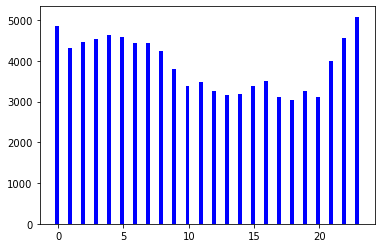

In [53]:
# plot bar for negative sentiments frequency along the hours:
x = np.arange(0, len(df0_gr.index))
plt.bar(x - 0.1, df0_gr['sentiment_0'], width = 0.3, color = 'blue')

<BarContainer object of 24 artists>

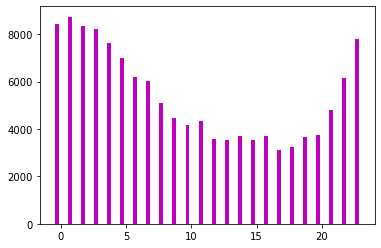

In [52]:
#plot bar for positive sentiments frequency along the hours:
plt.bar(x - 0.3, df0_gr['sentiment_1'], width = 0.3, color = 'm')

## 6. Visualizing and exploring the user attribute:

In [37]:
#performing one hot encoding on the sentiment attribute:
df1 = pd.concat([dev_df,pd.get_dummies(dev_df['sentiment'], prefix='sentiment')],axis=1)
df1.drop(['sentiment'], axis=1, inplace=True)
df1

,date,user,date_hour,clean_text,total,sentiment_0,sentiment_1
0,2009-05-18,Killandra,1,yes talking helps a lot going through it the...,2009-05-18 1 yes talking helps a lot going t...,0,1
1,2009-05-31,IMlisacowan,6,sunshine livingg ittt imma lie on the grass ...,2009-05-31 6 sunshine livingg ittt imma lie ...,0,1
2,2009-06-01,yaseminx3,11,something for your iphone,2009-06-01 11 something for your iphone yase...,0,1
3,2009-05-17,no_surprises,2,couldn t get in to the after party,2009-05-17 2 couldn t get in to the after pa...,1,0
4,2009-06-02,Rhi_ShortStack,0,a andy being mean again now i want maccas,2009-06-02 0 a andy being mean again now i w...,1,0
...,...,...,...,...,...,...,...
224989,2009-06-20,CynthiaBuroughs,20,yeah i hope iran people reach freedom they r...,2009-06-20 20 yeah i hope iran people reach ...,1,0
224990,2009-06-01,unitechy,1,trying the qwerty keypad,2009-06-01 1 trying the qwerty keypad unitechy,0,1
224991,2009-06-01,Xaan,6,i love jasper jackson but that wig in the bd...,2009-06-01 6 i love jasper jackson but that ...,1,0
224992,2009-06-19,Ginger_Billie,8,i am really tired and bored and bleh i feel ...,2009-06-19 8 i am really tired and bored and...,1,0


In [38]:
#grouping by the user attribute and dropping the columns we don't need:
df_grouped = df1.groupby('user').sum()
df_grouped.drop(['date_hour'], axis=1, inplace=True)
df_grouped


,sentiment_0,sentiment_1
user,,
007peter,13.0,1.0
12gaBrowningGal,7.0,10.0
15Stepz,0.0,16.0
16_MileyCyrus,36.0,38.0
18percentgrey,2.0,37.0
...,...,...
zubinsaxena,6.0,11.0
zuppalizzle,23.0,22.0
zuzluz,14.0,0.0


In [39]:
#sorting by the number of negative sentiments:
df2 = df_grouped.sort_values(by=['sentiment_0'], ascending=False)
df2[:20]

,sentiment_0,sentiment_1
user,,
lost_dog,412.0,0.0
webwoke,195.0,63.0
mcraddictal,156.0,49.0
SallytheShizzle,142.0,69.0
_magic8ball,101.0,40.0
Dogbook,95.0,49.0
mrs_mcsupergirl,90.0,28.0
Karen230683,90.0,88.0
nuttychris,89.0,69.0


In [40]:
#sorting by the number of postivie sentiments:
df3 = df_grouped.sort_values(by=['sentiment_1'], ascending=False)
df3[:20]

,sentiment_0,sentiment_1
user,,
what_bugs_u,0.0,184.0
DarkPiano,5.0,171.0
VioletsCRUK,43.0,166.0
keza34,4.0,160.0
tsarnick,30.0,156.0
shanajaca,8.0,151.0
ramdomthoughts,14.0,147.0
TraceyHewins,15.0,142.0
thisgoeshere,23.0,132.0


In [41]:
#checking if some of the top users in the development set are also in the evaluation set:
if 'VioletsCRUK' in eval_df.values:
    print('yes')
else:
    print('no')

yes


In [54]:
if 'lost_dog' in eval_df.values:
    print('yes')
else:
    print('no')

yes


In [55]:
if 'tsarnick' in eval_df.values:
    print('yes')
else:
    print('no')

yes


In [56]:
if 'DarkPiano' in eval_df.values:
    print('yes')
else:
    print('no')

yes


In [57]:
#check the average of the number postive and negative tweets for each user:
df2.mean()

sentiment_0     8.817302
sentiment_1    12.139489
dtype: float64